In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

## **Histograms**

In [2]:
df_DE_ind = df[(df['job_title_short']=='Data Engineer')&(df['job_country']=='India')].copy()

Text(0, 0.5, 'Number of jobs')

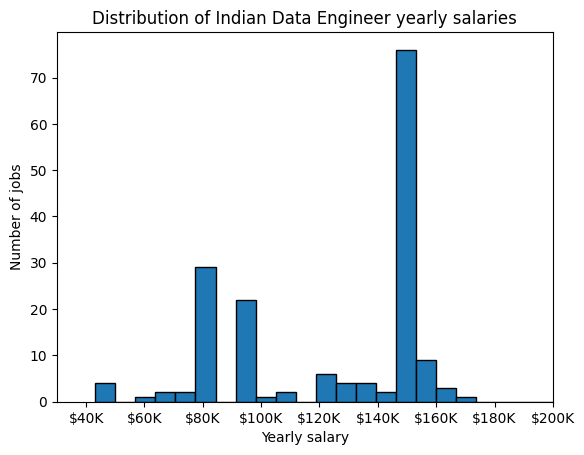

In [3]:
df_DE_ind['salary_year_avg'].plot(kind='hist',bins=30,edgecolor='black')
plt.xlim(30000,200000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

plt.title('Distribution of Indian Data Engineer yearly salaries')
plt.xlabel('Yearly salary')
plt.ylabel('Number of jobs')

## **Box Plot**

In [4]:
df_DA_ind = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='India')].copy()
#drop NaN from plotting column
df_DA_ind = df_DA_ind.dropna(subset=['salary_year_avg'])


<Axes: >

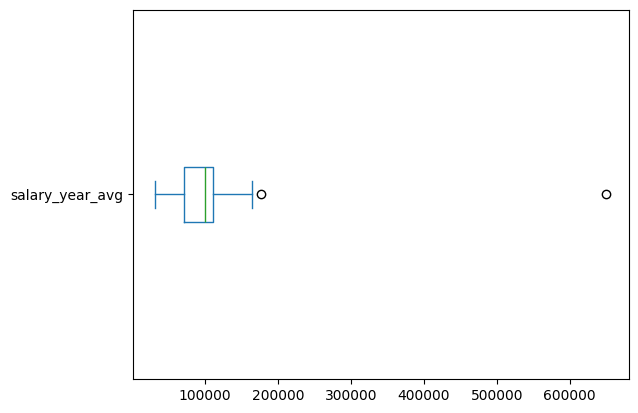

In [5]:
df_DA_ind['salary_year_avg'].plot(kind='box',vert=False)

**Using matplotlib method for box plot to compare diff. job titles**

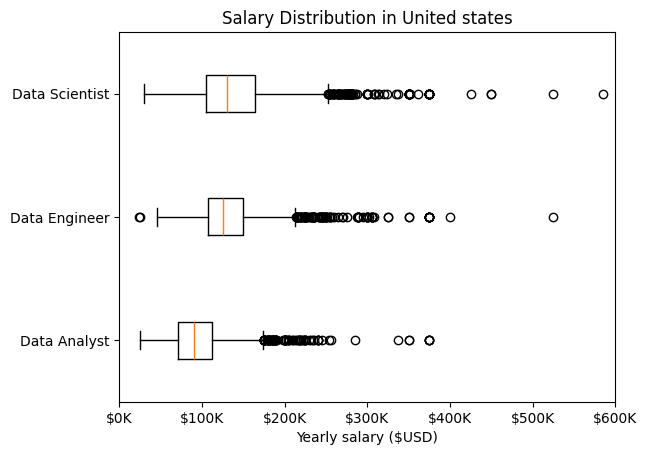

In [14]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles))&(df['job_country']=='United States')].copy()
df_US = df_US.dropna(subset='salary_year_avg')

job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution in United states')
plt.xlabel('Yearly salary ($USD)')
plt.xlim(0,600000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
plt.show()